# Model training and analysis for Fraud Detection

### Data Preperation

In [3]:
import pymongo
import pandas as pd
import scipy

client = pymongo.MongoClient("<mongodb connection string>")
db = client['<database>']
collection = db['<collection>']

df_train = pd.DataFrame.from_records(collection.find())
df = df_train
df

,_id,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,63a07226c904c2af242202cf,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,63a07226c904c2af242202d0,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,63a07226c904c2af242202d1,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,63a07226c904c2af242202d2,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,63a07226c904c2af242202d3,5,L47184,L,298.2,308.7,1408,40,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,63a07230c904c2af242229da,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,63a07230c904c2af242229db,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,63a07230c904c2af242229dc,9998,M24857,M,299,308.6,1645,33.4,22,0,No Failure
9998,63a07230c904c2af242229dd,9999,H39412,H,299,308.7,1408,48.5,25,0,No Failure


#### Various columns available for analysis

In [44]:
df.columns

Index(['_id', 'UDI', 'Product ID', 'Type', 'Air temperature',
       'Process temperature', 'Rotational speed', 'Torque', 'Tool wear',
       'Target', 'Failure Type'],
      dtype='object')

In [45]:
# These columns can be eliminated 
df.drop(['_id', 'UDI', 'Product ID', 'Target'], axis=1, inplace=True)

In [46]:
# Convert to type float
df[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']] = df[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']].astype(float)

In [48]:
# List of various failure types available in the dataset
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [49]:
# Unique types available
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [50]:
# Final columns available for training, with lable 'Failure Type'
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Failure Type'],
      dtype='object')

In [51]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)

In [54]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [55]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure Type
0,1,25.95,36.45,1551.0,42.8,0.0,0
1,2,26.05,36.55,1408.0,46.3,3.0,0
2,2,25.95,36.35,1498.0,49.4,5.0,0
3,2,26.05,36.45,1433.0,39.5,7.0,0
4,2,26.05,36.55,1408.0,40.0,9.0,0
...,...,...,...,...,...,...,...
9995,1,26.65,36.25,1604.0,29.5,14.0,0
9996,3,26.75,36.25,1632.0,31.8,17.0,0
9997,1,26.85,36.45,1645.0,33.4,22.0,0
9998,3,26.85,36.55,1408.0,48.5,25.0,0


### Data distribution

In [171]:
Y_newsplit = []
for val in X_newsplit:
    Y_newsplit.append(val[-1][-1])

[0.0, 1.0, 3.0, 2.0, 4.0, 5.0] [952, 11, 10, 10, 4, 13]


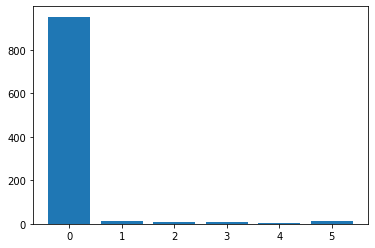

In [172]:
import matplotlib.pyplot as plt
from collections import Counter

# Use the Counter class to count the frequency of each value
frequency = Counter(Y_newsplit)

# Get the values and frequencies as separate lists
x_values = list(frequency.keys())
y_values = list(frequency.values())

print(x_values, y_values)
# Use the bar() function to plot the bars
plt.bar(x_values, y_values)

# Show the plot
plt.show()

### Data Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

### Decision Tree

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

decision = DecisionTreeClassifier()
decision.fit(X_train_new, y_train_new)
y_pred_dec = decision.predict(X_test_new)

decision_train = round(decision.score(X_train_new, y_train_new) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test_new) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")


Training Accuracy    : 100.0 %
Model Accuracy Score : 92.0 %
